
# **Data Collection**


In [49]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import numpy as np
import time

Title=[]
Fit_Platform=[]
Num_Of_Comments=[]
Num_Of_Likes=[]
Raiting=[]
Grade=[]
First_Released=[]
The_Game_reviewer=[]
The_Date_of_the_review=[]
Num_of_pros=[]
Num_of_cons=[]

In [50]:
url="https://www.gamespot.com/games/reviews/"
counter=1

while counter<=230:
    r = requests.get(url).content
    soup = BeautifulSoup(r, "html.parser") 
    list1 = soup.find("section",attrs= {"class":"editorial river"}) #בלוק הסקירות
    lists = list1.findAll('div', attrs={"class" : "card-item base-flexbox flexbox-align-center width-100 border-bottom-grayscale--thin"}) #סקירה
    #הוצאת תוכן מתוך העמוד הראשי
    for i in lists:
        content=i.find("div", attrs={"class":"card-item__main inner-space-top-small-rem flexbox-justify-between inner-space-bottom-small-rem base-flexbox flexbox-align-center"}) #הבלוק של הסרט
        
        leftcontent = content.find("div",attrs={"class":"card-item__content"}) #נתיב לפרטי הסקירה  
        
        #שם המשחק 
        try:
            titel=leftcontent.find("a",attrs={"card-item__link text-decoration--none"}).find("h4")#שם המשחק 
            Title.append(titel.text)
        except:
            Title.append(np.nan)
       
        #לאיזה סוגי פלטפורמוט המשחק מתאים
        try:
            fit_platform=content.find("div",attrs={"class":"card-item__content"}).find("span")
            Fit_Platform.append(fit_platform.text)
        except:
            Fit_Platform.append(np.nan)
        
        contantmeta=leftcontent.find("div",attrs={"class":"card-metadata"}).findAll("div") #נתיב למספר תגובות ולייקים
       
        #מספר התגובות
        try:
            num_of_comments=contantmeta[1] 
            Num_Of_Comments.append(num_of_comments.text)
        except:
            Num_Of_Comments.append(np.nan)
        
        #מספר לייקים
        try:
            num_of_likes=contantmeta[2]
            Num_Of_Likes.append(num_of_likes.text)
        except:
            Num_Of_Likes.append(np.nan)
        
        
        ratingcontent=content.find("div",attrs={"class":"card-review"}) #נתיב לתוכן הציון
       
        #ציון מספרי
        try:
            grade=ratingcontent.find("div",attrs={"class":"review-ring-score"}).find("div")
            Grade.append(grade.text)
        except:
            Grade.append(np.nan)
        
        #ציון במלל
        try:
            rating=ratingcontent.find("div",attrs={"class":"review-ring-score"}).find("span")
            Raiting.append(rating.text)
        except:
            Raiting.append(np.nan)

            
    #הוצאת תוכן מתוך הלינקים
   
    ReviewLinks=soup.find("section",attrs={"class":"editorial river"})#קישורים לסקירות
    linksToPages=[t['href'] for t in ReviewLinks.findAll("a")]
    urls=linksToPages 
    i=0
    for k in linksToPages:
        urls=['https://www.gamespot.com'+linksToPages[i]]
        i+=1
        for url2 in urls:
            response1 = requests.get(url2).content
            soup1 = BeautifulSoup(response1, "html.parser")
            
            #תאריך יציאה המשחק
            try:
                first_released=0
                for first_released in soup1.find("li",attrs={"class":"text-custom-regular"}).find("span"):
                    continue
                try:
                    First_Released.append(first_released.text)
                except:
                    First_Released.append(np.nan)
            except:
                First_Released.append(np.nan)  
                
                
            # שם מפרסם הסקירה 
            try:
                game_reviewer=0
                for game_reviewer in soup1.find("a",attrs={"class":"byline-author__name"}):
                    continue
                try:   
                    The_Game_reviewer.append(game_reviewer.text)
                except:
                    The_Game_reviewer.append(np.nan)
            except:
                The_Game_reviewer.append(np.nan)
            
            
            #תאריך פרסום הסקירה
            try:
                date_of_the_review=0
                for date_of_the_review in soup1.find("p",attrs={"class":"news-byline"}).find("time"):
                    continue
                try:
                    The_Date_of_the_review.append(date_of_the_review.text)
                except:
                    The_Date_of_the_review.append(np.nan)
            except:
                The_Date_of_the_review.append(np.nan)
            
            #מספר ביקורות טובות שיש על המשחק    
            try:
                w=0
                for num_of_pros in soup1.find("ul",attrs={"class":"review-breakdown__list"}).findAll("li"):
                    w+=1
                Num_of_pros.append(w)
            except:
                Num_of_pros.append(np.nan)
               
            
            #מספר ביקורות רעות על המשחק
            try:
                u=0
                for num_of_cons in soup1.find("div",attrs={"class":"review-breakdown__lists color-white"}).findAll("li"):
                    u+=1
                v=u-w
                Num_of_cons.append(v)
            except:
                Num_of_cons.append(np.nan)
                
                
    counter+=1
    time.sleep(2) #הפסקה בין עמוד לעמוד
    url="https://www.gamespot.com/games/reviews/?page="+str(counter)
       


In [51]:
df=pd.DataFrame({'Name of the game':Title,
                'Fit platform':Fit_Platform, 
                'Num Of comments':Num_Of_Comments,
                'Num Of likes':Num_Of_Likes,
                'Raiting':Raiting,
                'Grade':Grade,
                'Num of pros':Num_of_pros,
                'Num of cons':Num_of_cons,
                'First Released':First_Released,
                'The game rviewer':The_Game_reviewer,
                'The date of the review':The_Date_of_the_review})

# *Data Set*

In [52]:
 df

,Name of the game,Fit platform,Num Of comments,Num Of likes,Raiting,Grade,Num of pros,Num of cons,First Released,The game rviewer,The date of the review
0,World Of Warcraft: Dragonflight Review In Prog...,PC,52,5,In Progress,9,5.0,4.0,"Nov 23, 2004",\n Cameron Koch\n,"December 7, 2022 at 11:45AM PST"
1,Crisis Core: Final Fantasy 7 Reunion Review - ...,PS5,45,10,Great,8,4.0,2.0,"Mar 24, 2008",\n Jessica Howard\n,"December 6, 2022 at 12:28PM PST"
2,The Callisto Protocol Review - I Don't Belong ...,XBSX,261,15,Mediocre,5,3.0,3.0,"Dec 2, 2022",\n Jordan Ramée\n,"December 1, 2022 at 9:00PM PST"
3,Marvel's Midnight Suns Review - XCOM Superhero...,PC,32,11,Great,8,3.0,2.0,"Dec 2, 2022",\n Jordan Ramée\n,"November 30, 2022 at 10:17AM PST"
4,Evil West Review - Undead Redemption,PC,32,9,Fair,6,3.0,3.0,"Nov 22, 2022",\n Richard Wakeling\n,"November 23, 2022 at 5:38PM PST"
...,...,...,...,...,...,...,...,...,...,...,...
4820,Air Conflicts: Aces of World War II Review,PSP,0,5,Fair,6,3.0,3.0,NaN,\n Kevin VanOrd\n,"April 29, 2009 at 8:10AM PDT"
4821,Cocoto Platform Jumper Review,WII,0,1,Poor,4,1.0,3.0,NaN,\n Chris Watters\n,"April 28, 2009 at 5:54PM PDT"
4822,Professor Heinz Wolff's Gravity Review,DS,0,0,Poor,4.5,1.0,3.0,NaN,\n Tom Mc Shea\n,"April 27, 2009 at 5:57PM PDT"
4823,Professor Heinz Wolff's Gravity Review,WII,0,0,Mediocre,5,1.0,2.0,NaN,\n Tom Mc Shea\n,"April 27, 2009 at 5:57PM PDT"


In [53]:
df.to_csv('Data set before cleaning.csv',index = False)

# **GameSpot Review Scale**

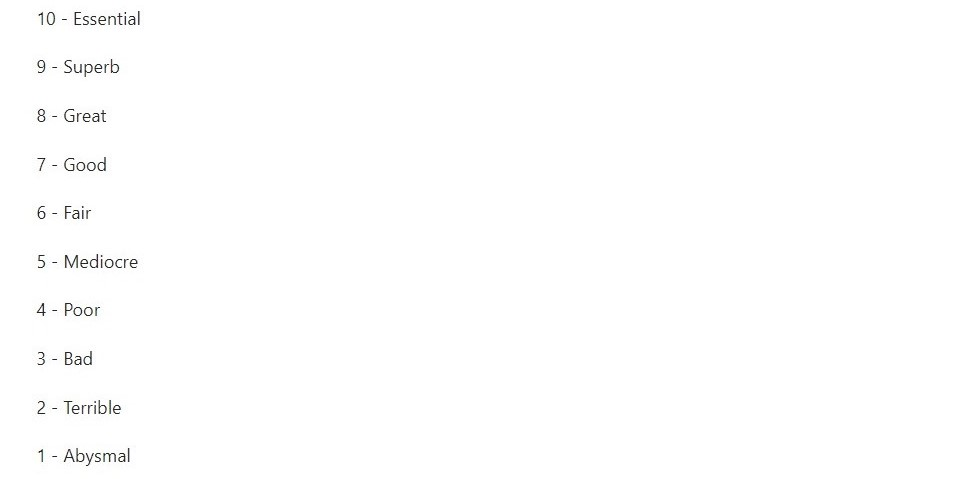